In [1]:
import pathlib
import sys
import os

# Hacky way to get to root package
if "notebooks" in os.getcwd():
    os.chdir("..")

In [20]:
%load_ext autoreload
%autoreload 2
    
import sys
from data_container import load_scouted_data, get_Teams_in_Match, load_pit_data
import pandas as pd
import numpy as np
import plotly.express as px
pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
scouted_data = load_scouted_data()
scouted_data
scouted_data["Total Fuel in Hub"] = scouted_data["Auto Fuel"] + scouted_data["Teleop Fuel"]

In [21]:
pit_data = load_pit_data()
pit_data

,Scouter Initials,Team Number,Intake,Climbing Level (Auto),Climbing Level (Endgame),Auto Start,Piece Auto,Climb type,Over Bumper?,Under Trench?,Carrying Capacity,Preload Number,Defense Skill (0-5)
0,abc,3504,Ground,1,1,right,16,in,True,False,8,8,2
1,abc,8393,Depot,0,2,right,6,in,False,True,12,6,1
2,abc,67,Ground,1,3,middle,3,out,True,True,6,3,4
3,abc,1678,Human Player Station,0,1,left,8,out,False,True,10,4,3
4,abc,118,Ground,1,1,left,0,in,True,True,10,0,5
5,abc,254,Human Player Station,1,0,middle,8,out,False,True,8,8,1
6,abc,2056,Depot,1,0,left,9,out,True,False,12,8,2


In [4]:
teams = get_Teams_in_Match()
match_data = scouted_data.loc[scouted_data["Team Number"].isin(teams)]
print(match_data)

   Scouter Initials Match Number Team Number  No Show  Auto Fuel  \
0               abc            1        1678    False         14   
1               abc            1        3504     True         15   
2               abc            1        8393    False         13   
3               abc            1         118     True          9   
4               abc            1         254     True          4   
5               abc            1          67    False         12   
6               abc            2        8393    False          7   
7               abc            2          67     True         15   
8               abc            2         118     True          3   
9               abc            2        1678    False          2   
11              abc            2        3504    False         24   
12              abc            3          67    False          6   
14              abc            3        3504    False         15   
15              abc            3        8393    

In [5]:
avg_6_teams=match_data.groupby("Team Number").mean(numeric_only=True)
avg_6_teams

,No Show,Auto Fuel,Auto Climbing Status,Auto Human Player Score,Teleop Fuel,Teleop Human Player Score,Total Fuel in Hub
Team Number,,,,,,,
118,0.571429,8.428571,0.428571,10.857143,125.571429,16.428571,134.000000
1678,0.400000,5.300000,0.400000,7.400000,106.800000,15.600000,112.100000
254,0.375000,8.000000,0.500000,9.125000,81.250000,24.375000,89.250000
3504,0.285714,17.571429,0.857143,5.857143,87.857143,19.285714,105.428571
67,0.555556,9.444444,0.444444,9.333333,135.666667,22.666667,145.111111
8393,0.300000,8.100000,0.200000,10.200000,139.900000,25.800000,148.000000


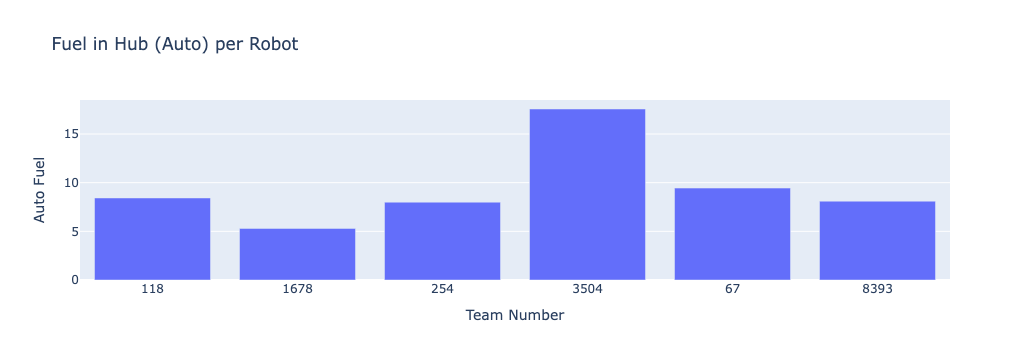

In [6]:
fig = px.bar(avg_6_teams, y="Auto Fuel", title="Fuel in Hub (Auto) per Robot")
fig.show()

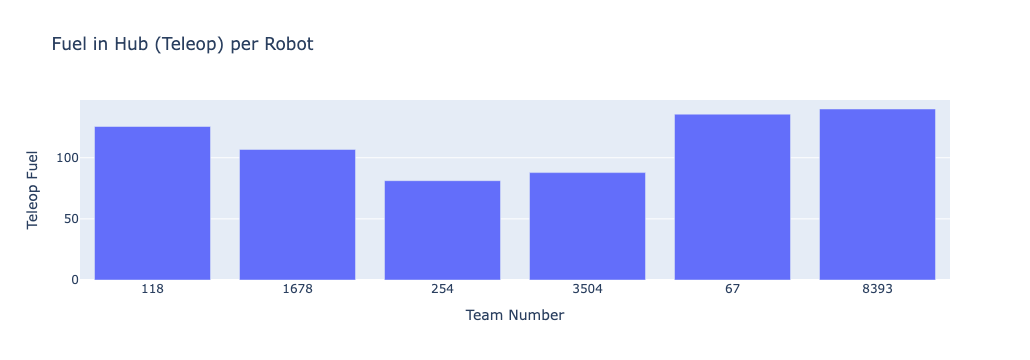

In [7]:
fig = px.bar(avg_6_teams, y="Teleop Fuel", title="Fuel in Hub (Teleop) per Robot")
fig.show()

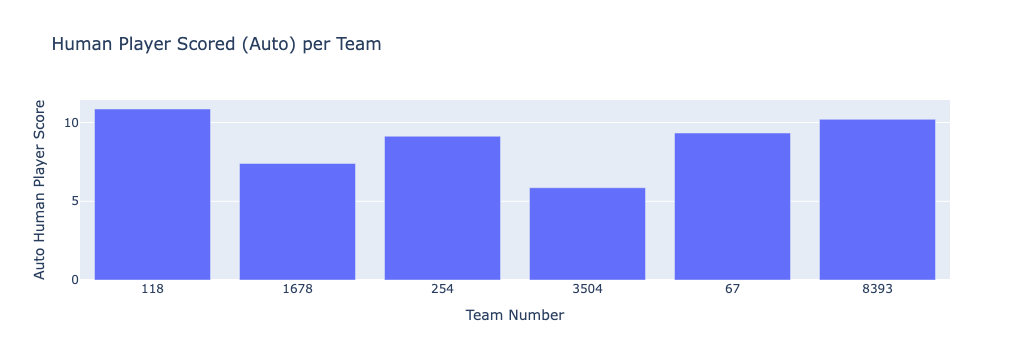

In [8]:
fig = px.bar(avg_6_teams, y="Auto Human Player Score", title="Human Player Scored (Auto) per Team")
fig.show()

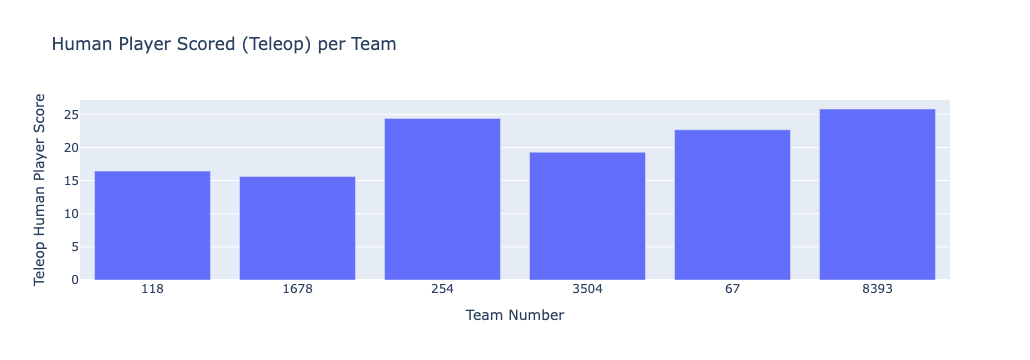

In [9]:
fig = px.bar(avg_6_teams, y="Teleop Human Player Score", title="Human Player Scored (Teleop) per Team")
fig.show()

In [10]:
avg_overall=scouted_data.groupby("Team Number").mean(numeric_only=True)
avg_overall

,No Show,Auto Fuel,Auto Climbing Status,Auto Human Player Score,Teleop Fuel,Teleop Human Player Score,Total Fuel in Hub
Team Number,,,,,,,
118,0.571429,8.428571,0.428571,10.857143,125.571429,16.428571,134.000000
1678,0.400000,5.300000,0.400000,7.400000,106.800000,15.600000,112.100000
2056,0.500000,12.000000,0.750000,10.000000,64.000000,20.000000,76.000000
254,0.375000,8.000000,0.500000,9.125000,81.250000,24.375000,89.250000
3504,0.285714,17.571429,0.857143,5.857143,87.857143,19.285714,105.428571
4467,0.200000,9.800000,0.800000,9.000000,75.000000,23.400000,84.800000
67,0.555556,9.444444,0.444444,9.333333,135.666667,22.666667,145.111111
8393,0.300000,8.100000,0.200000,10.200000,139.900000,25.800000,148.000000


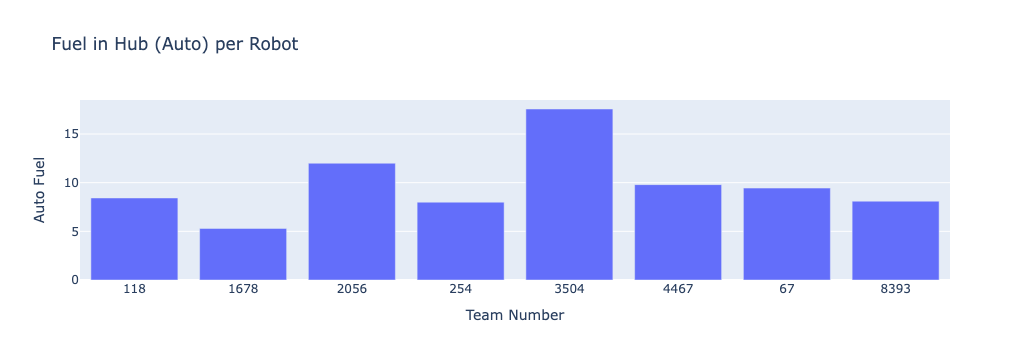

In [11]:
fig = px.bar(avg_overall, y="Auto Fuel", title="Fuel in Hub (Auto) per Robot")
fig.show()

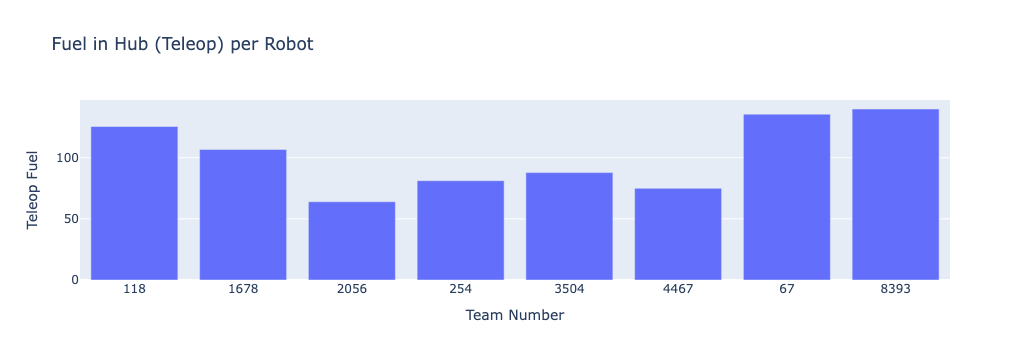

In [12]:
fig = px.bar(avg_overall, y="Teleop Fuel", title="Fuel in Hub (Teleop) per Robot")
fig.show()

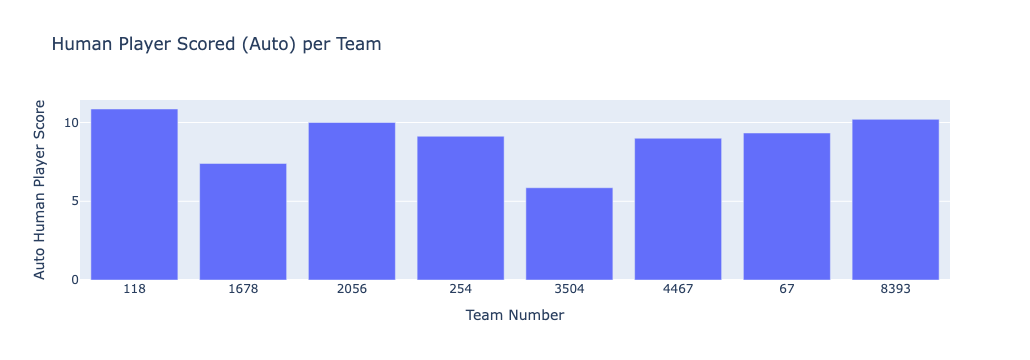

In [13]:
fig = px.bar(avg_overall, y="Auto Human Player Score", title="Human Player Scored (Auto) per Team")
fig.show()

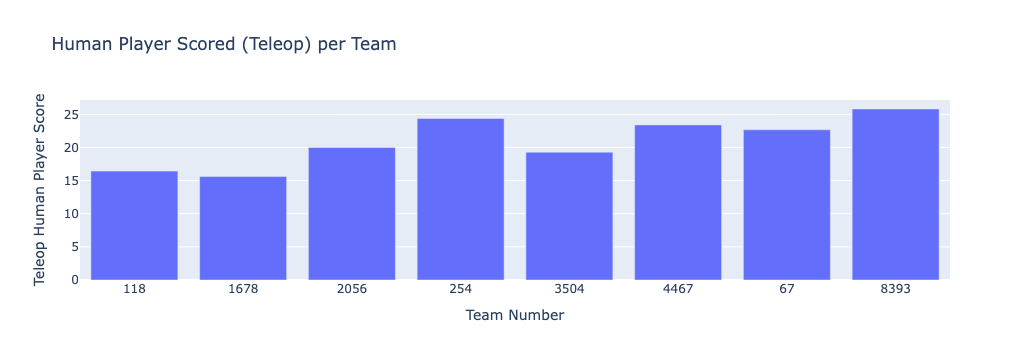

In [14]:
fig = px.bar(avg_overall, y="Teleop Human Player Score", title="Human Player Scored (Teleop) per Team")
fig.show()

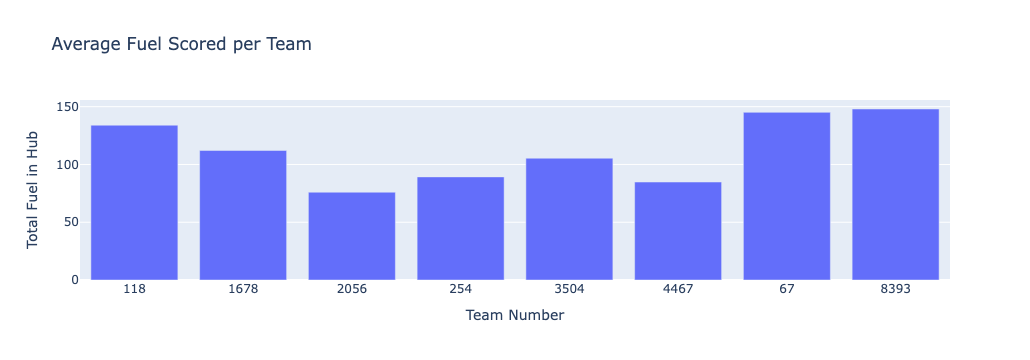

In [15]:
fig = px.bar(avg_overall, y="Total Fuel in Hub", title="Average Fuel Scored per Team")
fig.show()

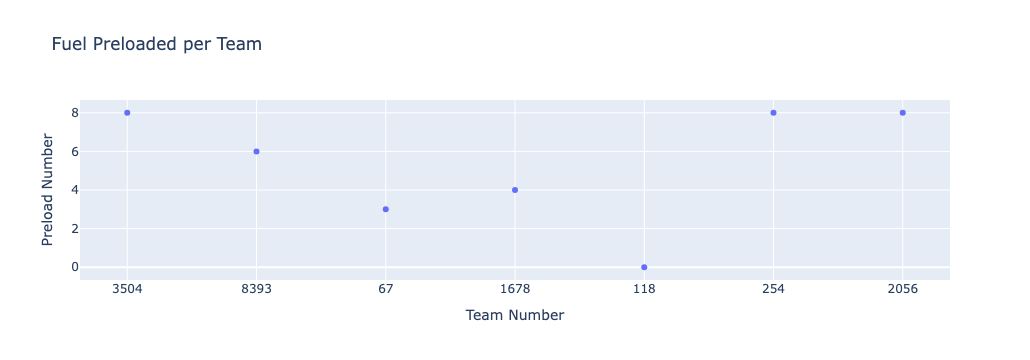

In [23]:
fig = px.scatter(pit_data, x="Team Number", y="Preload Number", title="Fuel Preloaded per Team")
fig.show()

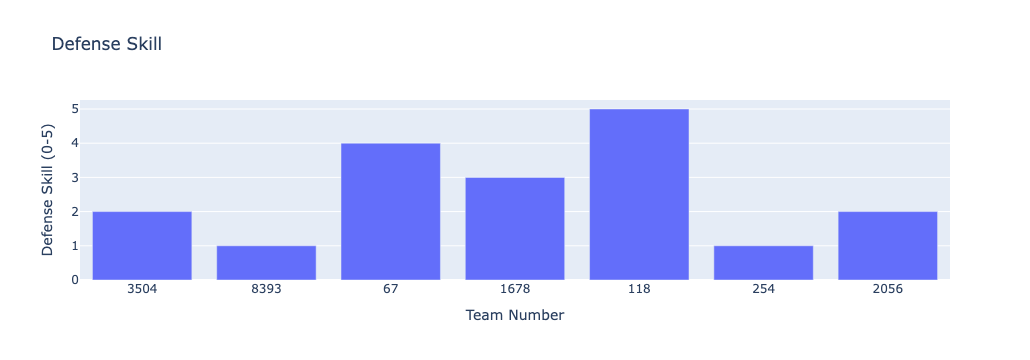

In [24]:
fig = px.bar(pit_data, x="Team Number", y="Defense Skill (0-5)", title="Defense Skill")
fig.show()